
# Load CT slices and plot axial, sagittal and coronal images

This example illustrates loading multiple files, sorting them by slice
location, building a 3D image and reslicing it in different planes.

.. usage:

   reslice.py <glob>
   where <glob> refers to a set of DICOM image files.

   Example: python reslice.py "*.dcm". The quotes are needed to protect
   the glob from your system and leave it for the script.

.. note:

   Uses numpy and matplotlib.

   Tested using series 2 from here
   https://www.pcir.org/researchers/54879843_20060101.html


glob: 
loading: rsna-2024-lumbar-spine-degenerative-classification/train_images/100206310/1792451510/18.dcm
loading: rsna-2024-lumbar-spine-degenerative-classification/train_images/100206310/1792451510/4.dcm
loading: rsna-2024-lumbar-spine-degenerative-classification/train_images/100206310/1792451510/11.dcm
loading: rsna-2024-lumbar-spine-degenerative-classification/train_images/100206310/1792451510/16.dcm
loading: rsna-2024-lumbar-spine-degenerative-classification/train_images/100206310/1792451510/6.dcm
loading: rsna-2024-lumbar-spine-degenerative-classification/train_images/100206310/1792451510/9.dcm
loading: rsna-2024-lumbar-spine-degenerative-classification/train_images/100206310/1792451510/17.dcm
loading: rsna-2024-lumbar-spine-degenerative-classification/train_images/100206310/1792451510/3.dcm
loading: rsna-2024-lumbar-spine-degenerative-classification/train_images/100206310/1792451510/5.dcm
loading: rsna-2024-lumbar-spine-degenerative-classification/train_images/100206310/179245

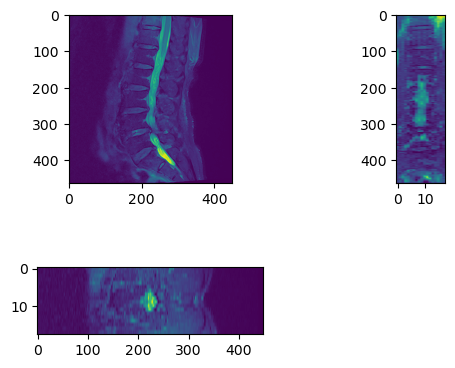

In [3]:
import pydicom
import numpy as np
import matplotlib.pyplot as plt
import sys
import glob

# load the DICOM files
files = []
print(f"glob: ")
for fname in glob.glob('rsna-2024-lumbar-spine-degenerative-classification/train_images/100206310/1792451510/*.dcm', 
                       recursive=False):
    print(f"loading: {fname}")
    files.append(pydicom.dcmread(fname))

print(f"file count: {len(files)}")

# skip files with no SliceLocation (eg scout views)
slices = []
skipcount = 0
for f in files:
    if hasattr(f, "SliceLocation"):
        slices.append(f)
    else:
        skipcount = skipcount + 1

print(f"skipped, no SliceLocation: {skipcount}")

# ensure they are in the correct order
slices = sorted(slices, key=lambda s: s.SliceLocation)

# pixel aspects, assuming all slices are the same
ps = slices[0].PixelSpacing
ss = slices[0].SliceThickness
ax_aspect = ps[1] / ps[0]
sag_aspect = ps[1] / ss
cor_aspect = ss / ps[0]

# create 3D array
img_shape = list(slices[0].pixel_array.shape)
img_shape.append(len(slices))
img3d = np.zeros(img_shape)

# fill 3D array with the images from the files
for i, s in enumerate(slices):
    img2d = s.pixel_array
    img3d[:, :, i] = img2d

# plot 3 orthogonal slices
a1 = plt.subplot(2, 2, 1)
plt.imshow(img3d[:, :, img_shape[2] // 2])
a1.set_aspect(ax_aspect)

a2 = plt.subplot(2, 2, 2)
plt.imshow(img3d[:, img_shape[1] // 2, :])
a2.set_aspect(sag_aspect)

a3 = plt.subplot(2, 2, 3)
plt.imshow(img3d[img_shape[0] // 2, :, :].T)
a3.set_aspect(cor_aspect)

plt.show()